In [ ]:
# Historical stock market data from Yahoo! Finance will be collected, analysed, transformed and visualised to gain insights into the stock returns for a selection of FTSE 100 
# constituent companies from 2014 to the end of 2023, as well as looking at the FTSE 100 Index itself. An attempt in Exploratory Analysis will also be performed.

In [1]:
import yfinance as yf

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.patches as mpatches
from matplotlib.dates import date2num, DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from mplfinance.original_flavor import candlestick_ohlc
import seaborn as sns

import datetime
from datetime import date, timedelta

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [7]:
ftse100_stocks = yf.download("AZN.L GSK.L ULVR.L BP.L SHEL.L HSBA.L", start=datetime.datetime(2014, 1, 1), 
                                     end=datetime.datetime(2023, 12, 31), group_by='tickers')
ftse100_stocks.head(10)

[*********************100%%**********************]  6 of 6 completed


Ticker            BP.L                                                  \
Price             Open        High         Low       Close   Adj Close   
Date                                                                     
2014-01-02  490.950012  490.950012  484.649994  488.850006  271.664001   
2014-01-03  488.850006  493.399994  486.200012  487.899994  271.136108   
2014-01-06  488.350006  491.600006  485.100006  488.950012  271.719543   
2014-01-07  488.049988  495.109009  484.100006  494.000000  274.525909   
2014-01-08  494.500000  494.721008  491.250000  492.850006  273.886871   
2014-01-09  495.100006  499.899994  494.100006  495.299988  275.248413   
2014-01-10  489.000000  499.350006  487.000000  497.000000  276.193085   
2014-01-13  496.299988  497.649994  490.544006  495.799988  275.526245   
2014-01-14  490.950012  492.808014  487.000000  491.049988  272.886536   
2014-01-15  493.399994  494.899994  491.045013  492.850006  273.886871   

Ticker                   AZN.L                                    ...  SHEL.L  \
Price           Volume    Open         High          Low   Close  ...     Low   
Date                                                              ...           
2014-01-02  17484921.0  3566.0  3592.500000  3545.500000  3558.0  ...  2141.5   
2014-01-03  18104875.0  3561.5  3604.000000  3554.000000  3585.5  ...  2147.5   
2014-01-06  18270944.0  3579.0  3607.850098  3579.000000  3598.5  ...  2144.0   
2014-01-07  23078624.0  3584.0  3591.000000  3557.000000  3562.5  ...  2137.0   
2014-01-08  15469583.0  3558.0  3571.500000  3539.500000  3549.5  ...  2141.0   
2014-01-09  24620468.0  3575.0  3613.750000  3564.000000  3572.5  ...  2141.0   
2014-01-10  37147710.0  3598.5  3676.000000  3580.500000  3652.0  ...  2156.5   
2014-01-13  21919521.0  3671.0  3675.500000  3367.070068  3663.5  ...  2172.0   
2014-01-14  22855348.0  3714.0  3779.500000  3696.000000  3755.5  ...  2161.0   
2014-01-15  27630089.0  3764.5  3845.000000  3746.639893  3845.0  ...  2167.5   

Ticker                                            GSK.L               \
Price        Close    Adj Close     Volume         Open         High   
Date                                                                   
2014-01-02  2155.5  1253.551514  3014631.0  1628.393677  1628.393677   
2014-01-03  2158.5  1255.296143  1808530.0  1611.268677  1623.642944   
2014-01-06  2147.0  1248.608276  2424268.0  1622.349609  1632.926758   
2014-01-07  2159.0  1255.587036  1971412.0  1626.379028  1637.459961   
2014-01-08  2143.5  1246.572754  2202404.0  1631.415771  1631.415771   
2014-01-09  2145.0  1247.445190  2532490.0  1612.276001  1640.256348   
2014-01-10  2190.0  1273.615112  5353986.0  1620.838623  1627.386353   
2014-01-13  2190.0  1273.615112  2483459.0  1607.239258  1609.161255   
2014-01-14  2174.0  1264.310303  2485415.0  1594.143555  1609.677979   
2014-01-15  2180.0  1267.799683  3330035.0  1612.779663  1636.452637   

Ticker                                                       
Price               Low        Close   Adj Close     Volume  
Date                                                         
2014-01-02  1609.253906  1611.268677  873.158630  3761631.0  
2014-01-03  1606.735474  1616.305420  875.888123  3059685.0  
2014-01-06  1617.816528  1628.897461  882.711792  3652561.0  
2014-01-07  1624.960693  1628.393677  882.438965  5358743.0  
2014-01-08  1610.765015  1610.765015  872.885925  5136342.0  
2014-01-09  1608.246582  1609.253906  872.066956  7337857.0  
2014-01-10  1609.757568  1609.757568  872.339966  5732216.0  
2014-01-13  1598.364380  1602.706055  868.518372  4855009.0  
2014-01-14  1591.121460  1603.209839  868.791687  5488406.0  
2014-01-15  1605.224487  1630.912109  883.803711  6446588.0  

[10 rows x 36 columns]

In [8]:
# Let's attempt some exploration of the data

In [9]:
# Dicplaying distribution of the data with descriptive statistics
ftse100_stocks.describe()

Ticker         BP.L                                                      \
Price          Open         High          Low        Close    Adj Close   
count   2518.000000  2518.000000  2518.000000  2518.000000  2518.000000   
mean     436.204366   441.172593   430.957263   436.011649   333.046456   
std       86.336674    85.858991    87.018529    86.219142    84.773480   
min      191.559998   194.699997     4.686000   193.440002   165.338577   
25%      367.237511   375.865005   362.266251   368.324989   265.023613   
50%      457.925003   462.875000   453.125000   457.050003   316.881027   
75%      497.075005   501.776237   492.100006   497.075005   404.201874   
max      602.000000   603.200012   595.400024   598.299988   551.291260   

Ticker                      AZN.L                                            \
Price         Volume         Open          High           Low         Close   
count   2.518000e+03   2525.00000   2525.000000   2525.000000   2525.000000   
mean    4.213920e+07   6719.89217   6798.408205   6649.829768   6721.224443   
std     2.315183e+07   2416.18695   2438.010166   2391.720797   2417.431889   
min     0.000000e+00   3558.00000   3571.500000   3367.070068   3549.500000   
25%     2.781845e+07   4568.00000   4625.000000   4521.000000   4572.500000   
50%     3.615217e+07   5912.00000   5961.000000   5866.000000   5930.000000   
75%     4.985297e+07   8514.00000   8614.000000   8430.000000   8509.000000   
max     2.574570e+08  12164.00000  12828.452148  12122.066406  12294.000000   

Ticker  ...       SHEL.L                                                GSK.L  \
Price   ...          Low        Close    Adj Close        Volume         Open   
count   ...  2523.000000  2523.000000  2523.000000  2.523000e+03  2524.000000   
mean    ...  2025.362580  2048.895621  1624.381084  1.079409e+07  1515.245355   
std     ...   421.917149   415.497710   436.635381  1.022093e+07   131.798914   
min     ...     3.045000   900.000000   793.262573  0.000000e+00  1209.836548   
25%     ...  1713.750000  1739.250000  1271.421204  4.992968e+06  1408.465668   
50%     ...  2132.862061  2154.000000  1525.055786  7.255502e+06  1507.611572   
75%     ...  2345.750000  2366.500000  1955.984741  1.258483e+07  1619.327545   
max     ...  2757.500000  2772.500000  2744.822266  1.381874e+08  1859.380859   

Ticker                                                                    
Price          High          Low        Close    Adj Close        Volume  
count   2524.000000  2524.000000  2524.000000  2524.000000  2.524000e+03  
mean    1529.543710  1501.441351  1514.858997  1152.892782  9.069918e+06  
std      134.587797   131.421220   132.075562   225.110353  4.472906e+06  
min     1224.333496  1199.561523  1199.561523   758.287109  1.000000e+02  
25%     1423.747498  1394.137329  1408.286133   935.655045  6.323974e+06  
50%     1521.815308  1493.140930  1507.661865  1148.460327  8.033218e+06  
75%     1632.448395  1606.357819  1618.420898  1340.625092  1.059168e+07  
max     2746.587891  1841.651367  1859.582275  1708.324829  4.539564e+07  

[8 rows x 36 columns]

In [11]:
# Lets summarise the data to the ddataframe to see if any values of datatypes are missing 
ftse100_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2525 entries, 2014-01-02 to 2023-12-29
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (BP.L, Open)         2518 non-null   float64
 1   (BP.L, High)         2518 non-null   float64
 2   (BP.L, Low)          2518 non-null   float64
 3   (BP.L, Close)        2518 non-null   float64
 4   (BP.L, Adj Close)    2518 non-null   float64
 5   (BP.L, Volume)       2518 non-null   float64
 6   (AZN.L, Open)        2525 non-null   float64
 7   (AZN.L, High)        2525 non-null   float64
 8   (AZN.L, Low)         2525 non-null   float64
 9   (AZN.L, Close)       2525 non-null   float64
 10  (AZN.L, Adj Close)   2525 non-null   float64
 11  (AZN.L, Volume)      2525 non-null   int64  
 12  (ULVR.L, Open)       2524 non-null   float64
 13  (ULVR.L, High)       2524 non-null   float64
 14  (ULVR.L, Low)        2524 non-null   float64
 15  (ULVR.L, Close)     

In [15]:
# Number of rows = number of trading days
ftse100_stocks.shape

(2525, 36)

In [20]:
# Adjusted Close price will be used to take into account all corporate actions, such as stock splits and dividends, to give a more accurate reflection of the true value 
# of the stock and present a coherent picture of returns. 
# Dataframe to contain Adjusted Close price for each company's stock.

adj_close = pd.DataFrame()

tickers = ['AZN.L', 'GSK.L', 'ULVR.L', 'BP.L', 'SHEL.L', 'HSBA.L']
for ticker in tickers:
    adj_close[ticker] = ftse100_stocks[ticker]['Adj Close']

adj_close

,AZN.L,GSK.L,ULVR.L,BP.L,SHEL.L,HSBA.L
Date,,,,,,
2014-01-02,2509.891113,873.158630,1741.063721,271.664001,1253.551514,383.506226
2014-01-03,2529.290771,875.888123,1747.496460,271.136108,1255.296143,381.587799
2014-01-06,2538.460449,882.711792,1744.637939,271.719543,1248.608276,383.680511
2014-01-07,2513.065918,882.438965,1746.067139,274.525909,1255.587036,392.865692
2014-01-08,2503.895508,872.885925,1721.766846,273.886871,1246.572754,392.110046
...,...,...,...,...,...,...
2023-12-21,10480.000000,1450.000000,3779.000000,466.250000,2557.000000,622.500000
2023-12-22,10436.000000,1449.599976,3787.000000,467.200012,2566.500000,627.799988
2023-12-27,10528.000000,1449.599976,3787.500000,467.200012,2556.000000,631.500000


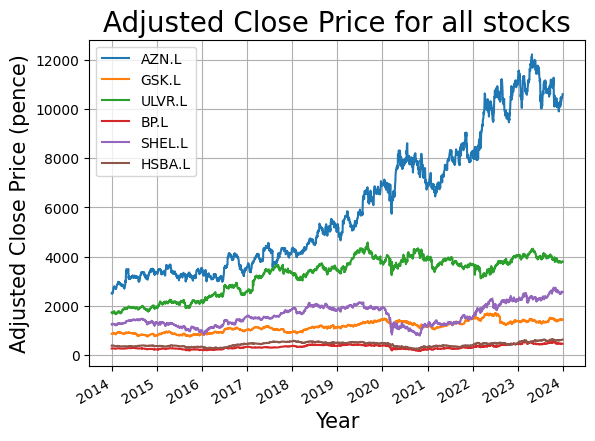

In [21]:
# Plot Adjusted Close price for all stocks

adj_close.plot(grid = True)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Adjusted Close Price for all stocks', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Adjusted Close Price (pence)', color = 'black', fontsize = 15);

In [22]:
# Here the absolute price is displayed rather than relative change which we are more concerned with when trading.
# AZN.L and ULVR.L stocks are far more expensive than BP.L and HSBA.L making the latter appear much less volatile than they truly are.

In [23]:
# Let's alculate min and max Adjusted Close price 

adj_close_min_max = adj_close.apply(lambda x: pd.Series([x.min(), x.max()], 
                              index=['min', 'max']))

adj_close_min_max

,AZN.L,GSK.L,ULVR.L,BP.L,SHEL.L,HSBA.L
min,2503.895508,758.287109,1663.874268,165.338577,793.262573,244.147324
max,12215.059570,1708.324829,4579.083008,551.291260,2744.822266,650.370056


In [24]:
# We will use two different scales when plotting the data.
# One scale will be used to plot the BP.L and HSBA.L, and the other for more expensive stocks.

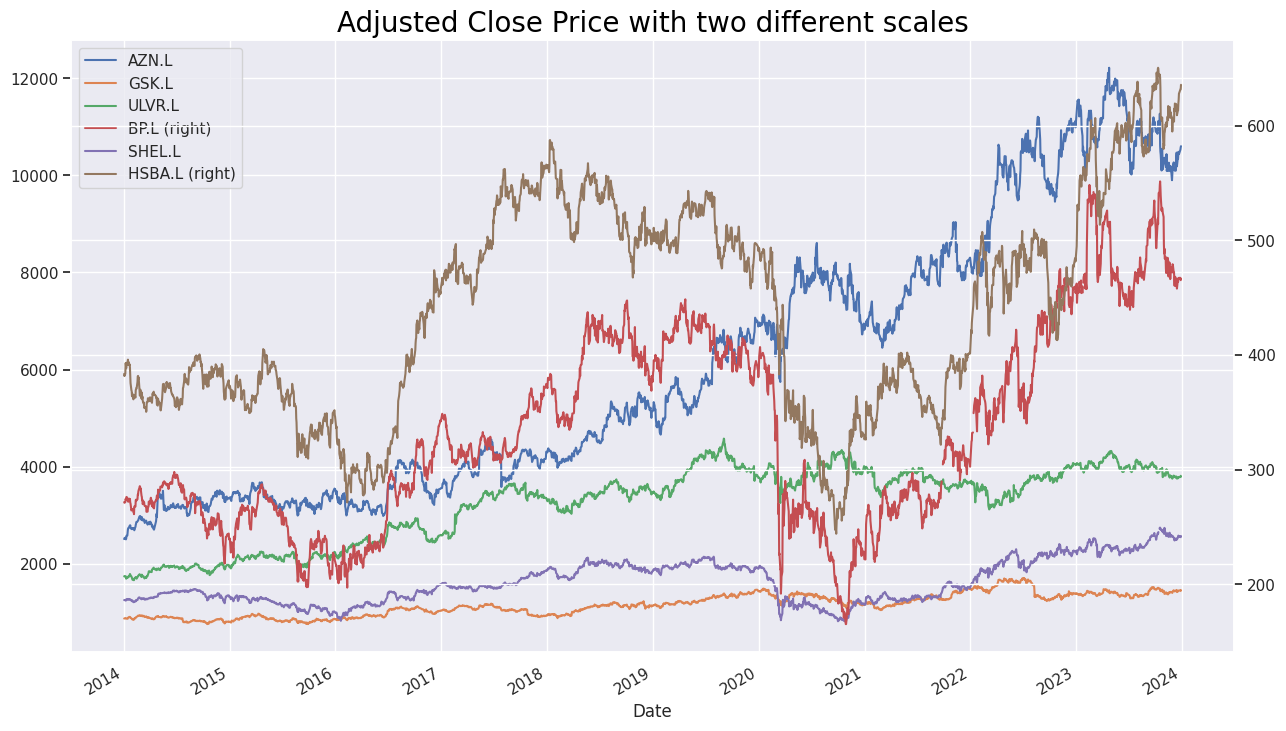

In [25]:
# Plot BP.L and HSBA.L data on a secondary y-axis

adj_close.plot(secondary_y = ["BP.L", "HSBA.L"], grid = True)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Adjusted Close Price with two different scales', color = 'black', fontsize = 20);

In [27]:
# Next we would want to see the returns of each stocks. However this requires transforming of the data to better suite our needs.
# So we would want to plot return_{t,0}  = \frac{price_t}{price_0} by applying the lambda function to each column in an adjusted close datatframe.
returns_lambda = adj_close.apply(lambda x: x / x[0])
returns_lambda.head()

,AZN.L,GSK.L,ULVR.L,BP.L,SHEL.L,HSBA.L
Date,,,,,,
2014-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2014-01-03,1.007729,1.003126,1.003695,0.998057,1.001392,0.994998
2014-01-06,1.011383,1.010941,1.002053,1.000204,0.996057,1.000454
2014-01-07,1.001265,1.010628,1.002874,1.010535,1.001624,1.024405
2014-01-08,0.997611,0.999688,0.988917,1.008182,0.994433,1.022435


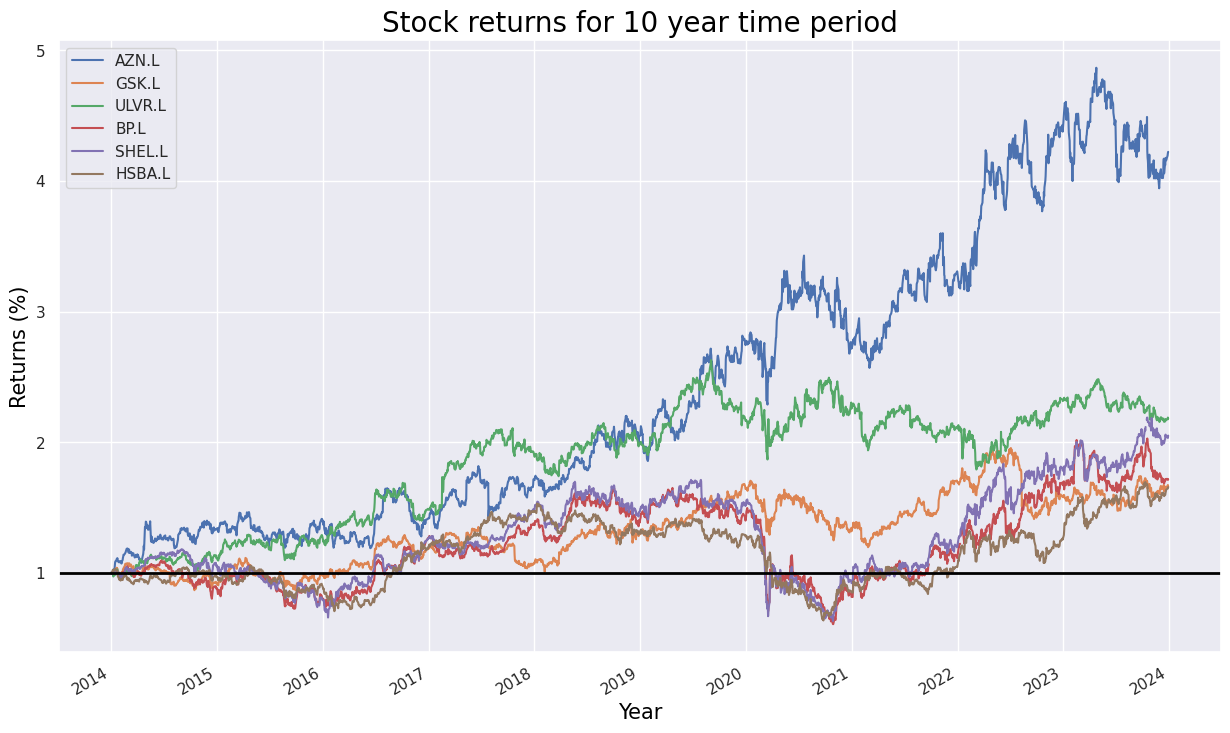

In [29]:
# Plot return_{t,0}  = \frac{price_t}{price_0} with transformed data to gen an insight on how profitable the stock had been.

returns_lambda.plot(grid = True).axhline(y = 1, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Stock returns for 10 year time period', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Returns (%)', color = 'black', fontsize = 15);

In [31]:
# Covid lockdown alterations could be clearly observed: HSBC for example plummeted down and had't recovered until late 2022, when AstraZeneca soared at the beginning of 2020. 
# So we can clearly state that such plot is way more useful as we can observe not only the profitability of each stock, but also the correlation of some stocks (especially in
# the year 2020)

In [32]:
# Create dataframe to contain returns for each company's stock to plot the change of each stock per day

returns = pd.DataFrame()

In [33]:
# Another point of interest is the daily volatility (aka percentage change) with the formula increase_{t}  = \frac{price_t - price_{t-1}}{price_t}.
# This can be achieved with the pandas  pct_change() method which computes the percentage change from the previous row by default.

tickers = ['AZN.L', 'GSK.L', 'ULVR.L', 'BP.L', 'SHEL.L', 'HSBA.L']
for ticker in tickers:
    returns[ticker] = ftse100_stocks[ticker]['Adj Close'].pct_change() * 100

returns

,AZN.L,GSK.L,ULVR.L,BP.L,SHEL.L,HSBA.L
Date,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,0.772928,0.312600,0.369472,-0.194318,0.139175,-0.500233
2014-01-06,0.362539,0.779057,-0.163578,0.215182,-0.532772,0.548422
2014-01-07,-1.000391,-0.030908,0.081920,1.032817,0.558923,2.393966
2014-01-08,-0.364909,-1.082572,-1.391716,-0.232779,-0.717934,-0.192342
...,...,...,...,...,...,...
2023-12-21,-0.038153,0.332137,-0.263922,-0.160600,-0.929872,0.500480
2023-12-22,-0.419847,-0.027588,0.211696,0.203756,0.371529,0.851404
2023-12-27,0.881564,0.000000,0.013203,0.000000,-0.409117,0.589362


In [34]:
# Cleaning the data by dropping the NaN values

returns.dropna(inplace=True)
returns.head()

,AZN.L,GSK.L,ULVR.L,BP.L,SHEL.L,HSBA.L
Date,,,,,,
2014-01-03,0.772928,0.312600,0.369472,-0.194318,0.139175,-0.500233
2014-01-06,0.362539,0.779057,-0.163578,0.215182,-0.532772,0.548422
2014-01-07,-1.000391,-0.030908,0.081920,1.032817,0.558923,2.393966
2014-01-08,-0.364909,-1.082572,-1.391716,-0.232779,-0.717934,-0.192342
2014-01-09,0.647965,-0.093823,-1.618955,0.497118,0.069987,-0.948861


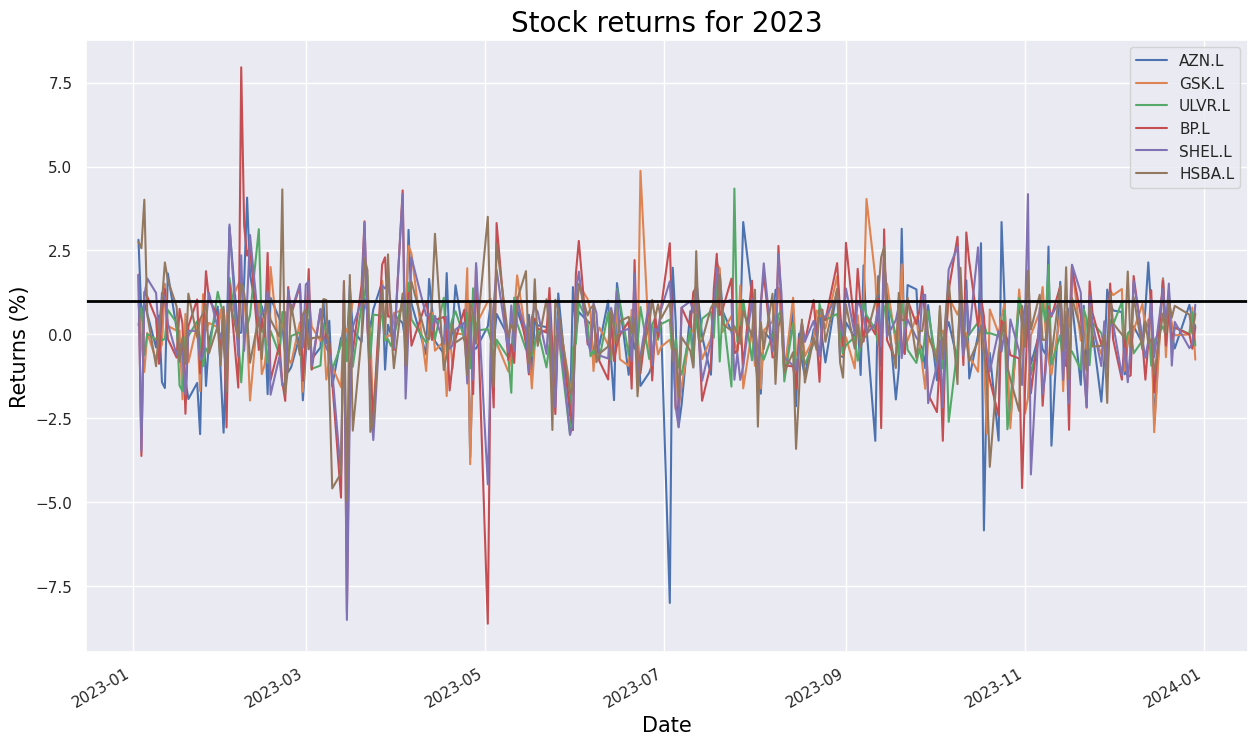

In [35]:
# Plot returns for 2023 that will show changes between trading days. THis is generally considered as a more advanced approach to modelling of equity behaviour.

returns.loc['2023-01-01':'2023-12-31'].plot(grid = True).axhline(y = 1, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Stock returns for 2023', color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('Returns (%)', color = 'black', fontsize = 15);

In [38]:
# Another way to explore stock growth is with log differences. Taking the natural log of the prices will give an approximation to the true daily returns.
# This can be represented with the formula 𝑐ℎ𝑎𝑛𝑔𝑒𝑡  =  𝑙𝑜𝑔(𝑝𝑟𝑖𝑐𝑒𝑡)−𝑙𝑜𝑔(𝑝𝑟𝑖𝑐𝑒𝑡−1)
# According to the Financial math textbook: 
# Using logs, or summarising changes in terms of continuous compounding, has a number of advantages over looking at simple percent changes. 
# For example, if your portfolio goes up by 50% (say from £100 to £150) and then declines by 50% (say from £150 to £75), you’re not back where you started. 
# If you calculate your average percentage return (in this case, 0%), that’s not a particularly useful summary of the fact that you actually ended up 25% below where you started.
# By contrast, if your portfolio goes up in logarithmic terms by 0.5, and then falls in logarithmic terms by 0.5, you are exactly back where you started. 
# The average log return on your portfolio is exactly the same number as the change in log price between the time you bought it and the time you sold it, 
# divided by the number of years that you held it.

In [39]:
# Use numpy's log function to obtain and plot the log differences of the adjusted price data

stock_change = adj_close.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.

stock_change.head()

,AZN.L,GSK.L,ULVR.L,BP.L,SHEL.L,HSBA.L
Date,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,0.007700,0.003121,0.003688,-0.001945,0.001391,-0.005015
2014-01-06,0.003619,0.007760,-0.001637,0.002150,-0.005342,0.005469
2014-01-07,-0.010054,-0.000309,0.000819,0.010275,0.005574,0.023658
2014-01-08,-0.003656,-0.010885,-0.014015,-0.002331,-0.007205,-0.001925


In [40]:
# Clean up the data by dropping NaNs

stock_change.dropna(inplace=True)
stock_change.head()

,AZN.L,GSK.L,ULVR.L,BP.L,SHEL.L,HSBA.L
Date,,,,,,
2014-01-03,0.007700,0.003121,0.003688,-0.001945,0.001391,-0.005015
2014-01-06,0.003619,0.007760,-0.001637,0.002150,-0.005342,0.005469
2014-01-07,-0.010054,-0.000309,0.000819,0.010275,0.005574,0.023658
2014-01-08,-0.003656,-0.010885,-0.014015,-0.002331,-0.007205,-0.001925
2014-01-09,0.006459,-0.000939,-0.016322,0.004959,0.000700,-0.009534


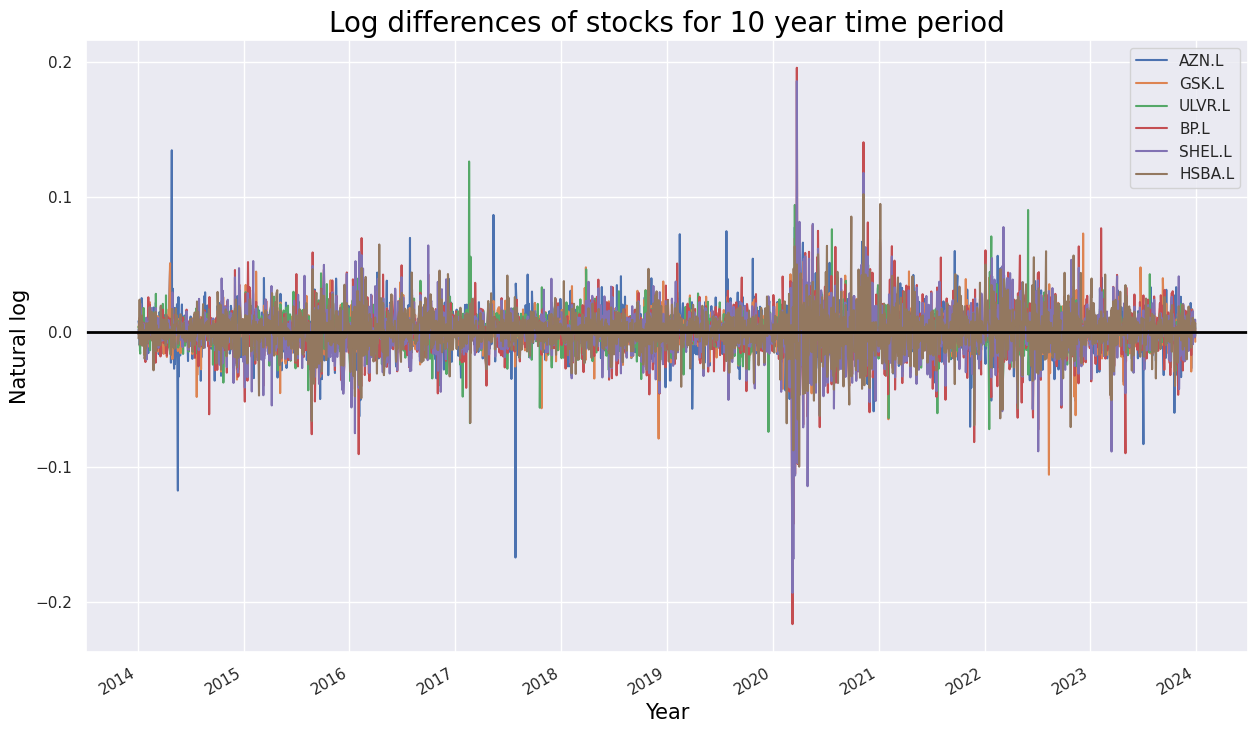

In [41]:
# Plot log differences for 2014-2024

stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Log differences of stocks for 10 year time period', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Natural log', color = 'black', fontsize = 15);

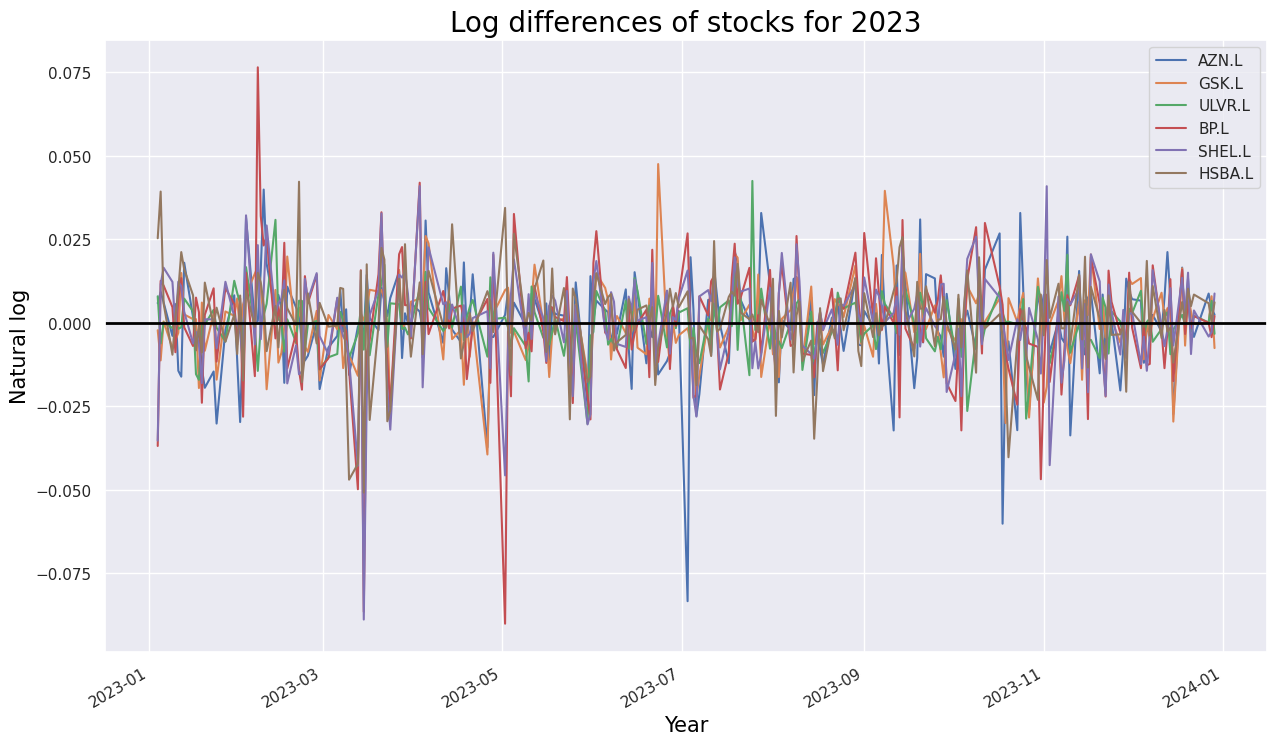

In [43]:
# Plot log differences for 2023 (since 2024 has just begun)

stock_change.loc['2023-01-01':'2023-12-31'][1:].plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Log differences of stocks for 2023', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Natural log', color = 'black', fontsize = 15);

In [44]:
# Annuallised returns

#To keep the returns on the same time scale - the annual percentage rate needs to be computed
stock_change_apr = stock_change * 252 * 100    # There are 252 trading days in a year; the 100 converts to percentages

stock_change_apr

,AZN.L,GSK.L,ULVR.L,BP.L,SHEL.L,HSBA.L
Date,,,,,,
2014-01-03,194.029036,78.652282,92.935311,-49.015869,35.047688,-126.375185
2014-01-06,91.194741,195.561630,-41.255418,54.167509,-134.617462,137.824821
2014-01-07,-253.368005,-7.789980,20.635271,258.935042,140.456458,596.171476
2014-01-08,-92.125322,-274.295630,-353.175734,-58.728635,-181.571853,-48.516860
2014-01-09,162.760419,-23.654551,-411.315271,124.963459,17.630508,-240.254738
...,...,...,...,...,...,...
2023-12-21,-9.616486,83.559922,-66.596233,-40.503625,-235.424056,125.806499
2023-12-22,-106.024253,-6.953108,53.291059,51.294264,93.451849,213.645515
2023-12-27,221.180584,0.000000,3.326952,0.000000,-103.309076,148.083184


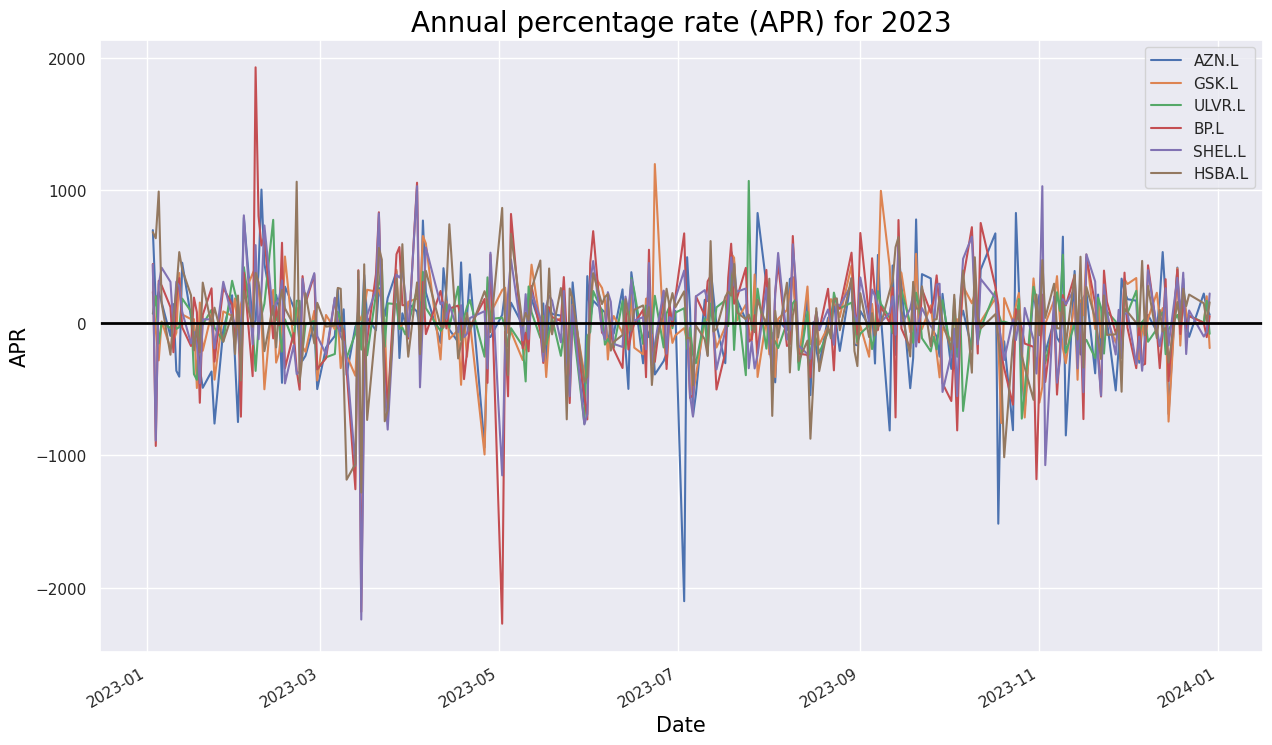

In [45]:
# Plotting annualised returns for the last year (2023)

stock_change_apr['2023-01-01':'2023-12-31'].plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Annual percentage rate (APR) for 2023', color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('APR', color = 'black', fontsize = 15);

In [52]:
# A bit of tatistics (thank you CFA institute for excellent course on descriptive statistics)

In [51]:
# Calculating the min (aka worst single day returns) and max (aka best single day returns) for 2014 - 2023 

In [53]:
# Worst single day returns

returns.idxmin()


AZN.L    2017-07-27
GSK.L    2022-08-11
ULVR.L   2019-12-17
BP.L     2020-03-09
SHEL.L   2020-03-09
HSBA.L   2020-04-01
dtype: datetime64[ns]

In [54]:
# Best single day returns

returns.idxmax()

AZN.L    2014-04-28
GSK.L    2022-12-07
ULVR.L   2017-02-17
BP.L     2020-03-24
SHEL.L   2020-03-24
HSBA.L   2020-11-09
dtype: datetime64[ns]

In [55]:
# Mean
# The mean is used to estimate the performance of a company’s stock price over a particular time period. 
# Here it is the average of the returns, and also determines the standard deviation and variance.

# Computing mean to give a representation of the average expected returns 

returns.mean()

AZN.L     0.069041
GSK.L     0.028097
ULVR.L    0.038773
BP.L      0.040015
SHEL.L    0.045571
HSBA.L    0.031483
dtype: float64

In [56]:
# Variance
# Variance measures variability from the average or mean. It correlates to the size of the overall range of the data set, being greater when there is a wider range 
# and narrower when there is a narrower range. It is calculated by taking the differences between each value in the data set and the mean, squaring the differences
# to make them positive, and dividing the sum of the squares by the number of values in the data set.
# The calculation of variance uses squares because it weighs outliers more heavily than data closer to the mean. This calculation also prevents differences above the mean 
# from cancelling out those below, which would result in a variance of zero.
# Variance formula σ<sup>2</sup> = \frac {\sum_{i = 1}^n (x_i - \overline{x})^2}{n}

# Computing variance to give a measure of the dispersion of returns around the mean

returns.var()

AZN.L     2.385421
GSK.L     1.595471
ULVR.L    1.577523
BP.L      3.724308
SHEL.L    3.410567
HSBA.L    2.295925
dtype: float64

In [57]:
# Standard deviation
# Standard deviation (σ) is often used by investors to measure the risk of a stock or a stock portfolio, the basic idea being that it is a measure of volatility. 
# It looks at how far from the mean a group of values is, and is calculated as the square root of variance by figuring out the variation between each data point relative to 
# the mean. Essentially, it is the square root of the average squared deviation from the mean, and the more spread out the values are, the higher the standard deviation.

# Computing the standard deviation to describe variability in the stock returns from the mean 
 
returns.std()

AZN.L     1.544481
GSK.L     1.263119
ULVR.L    1.255995
BP.L      1.929847
SHEL.L    1.846772
HSBA.L    1.515231
dtype: float64

In [58]:
# Skewness
# Financial returns are typically positively or negatively skewed and warp the look of the normally distributed bell-shaped curve distorting the accuracy of standard deviation
# as a measure of risk. Skewness essentially measures the relative size of the two tails of the distribution.

# Computing skewness to measure the asymmetry of the data around its mean

returns.skew()

AZN.L    -0.124108
GSK.L    -0.260407
ULVR.L    0.672700
BP.L      0.184145
SHEL.L   -0.061573
HSBA.L    0.092083
dtype: float64

In [59]:
# Kurtosis
# Kurtosis is a measure of the combined sizes of the two tails - not the peakedness or flatness.
# It measures the tail-heaviness of the distribution, or amount of probability in the tails.

# Computing kurtosis as a measure of the combined sizes of the two tails.

returns.kurt()

AZN.L     10.523349
GSK.L      5.132715
ULVR.L    11.116654
BP.L      14.407980
SHEL.L    14.198970
HSBA.L     5.200397
dtype: float64

In [60]:
# A normal distribution has a kurtosis of 3, however the pandas kurtosis function makes it a uniform zero and in this case the measure is called excess kurtosis.
# Since the analysed decade had both calm years at the beginning and super-turbulent 2020/2021/2022/2023 nearly all of our honorable guinea pigs demonstrate excess kurtosis. 

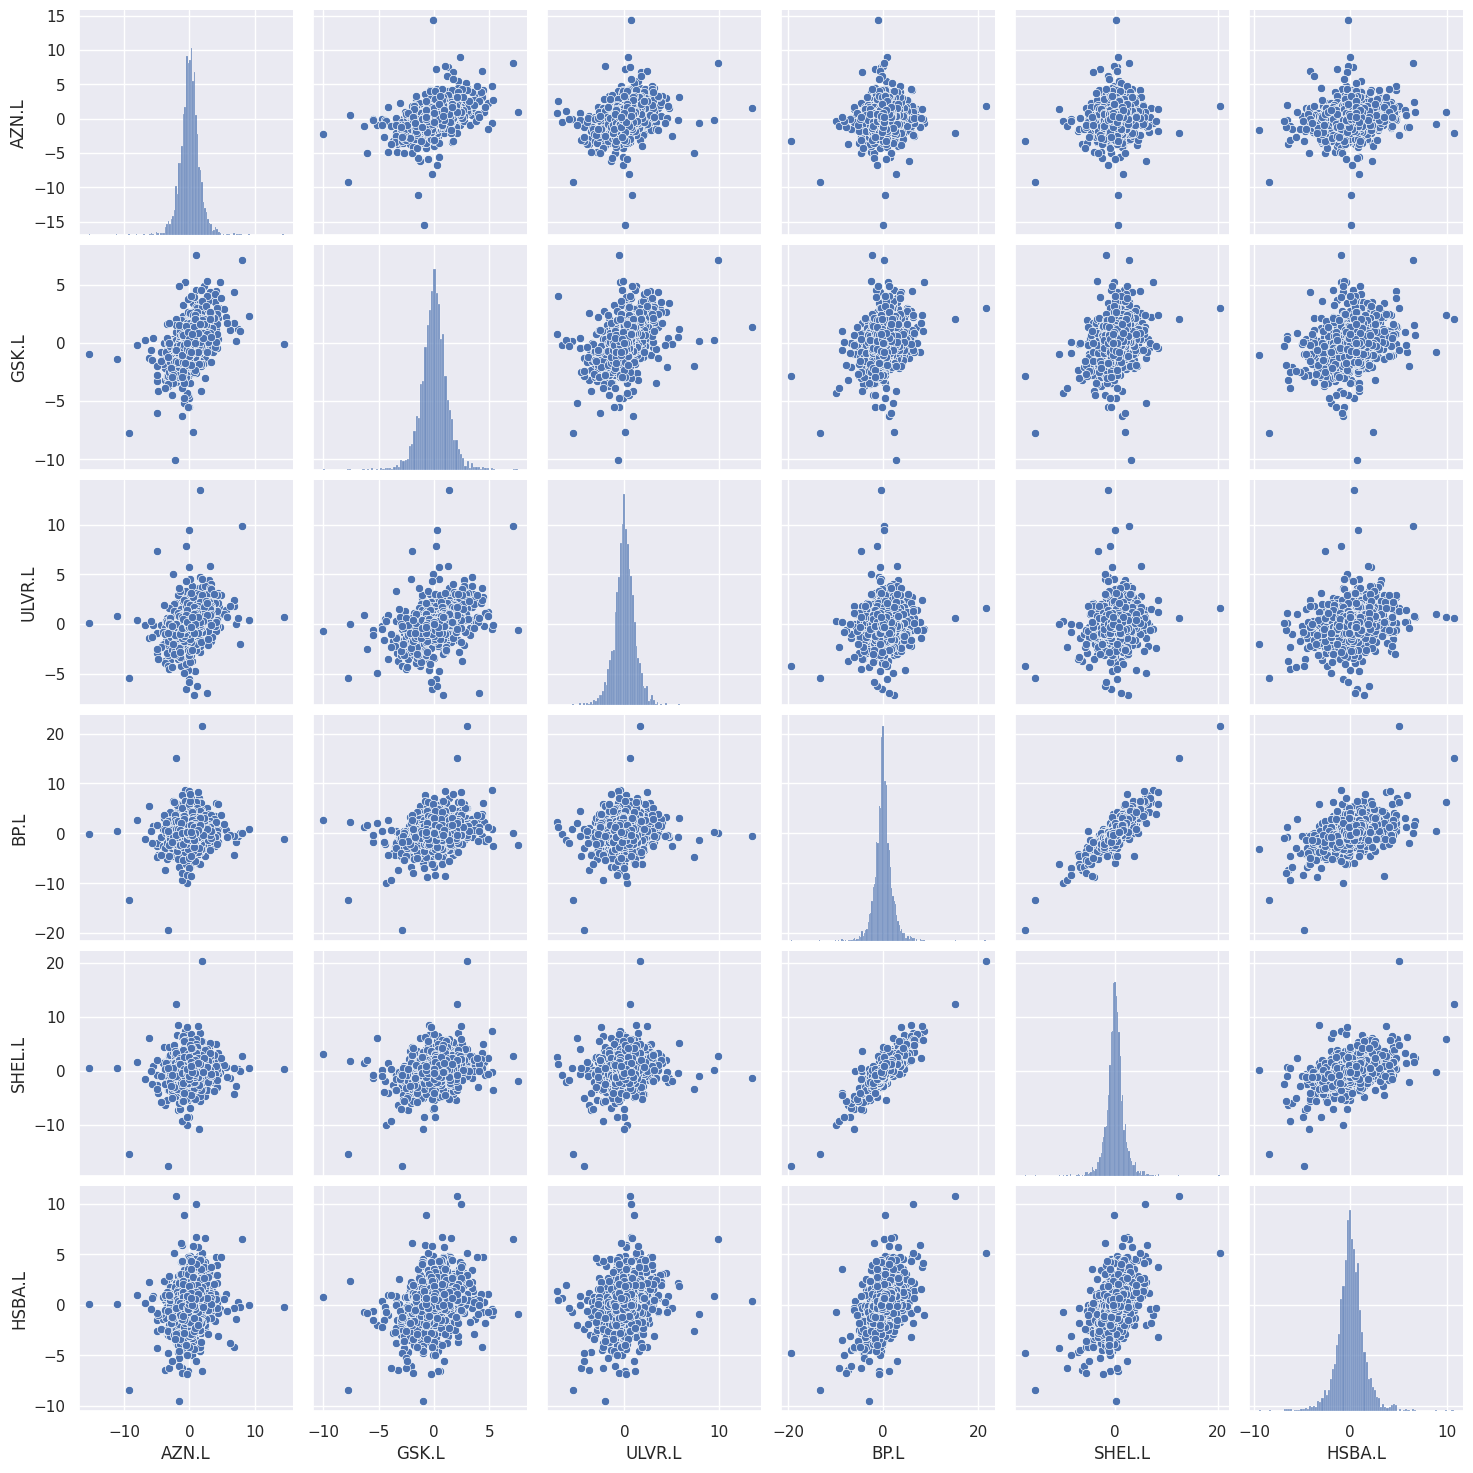

In [61]:
# Data visualisation


# Plot pairwise relationships of the stocks with the pairplot() function which uses scatterplot() for each pairing of the variables and histplot() for the marginal plots 
# along the diagonal.
# Pairplot of returns dataframe 

sns.pairplot(returns);

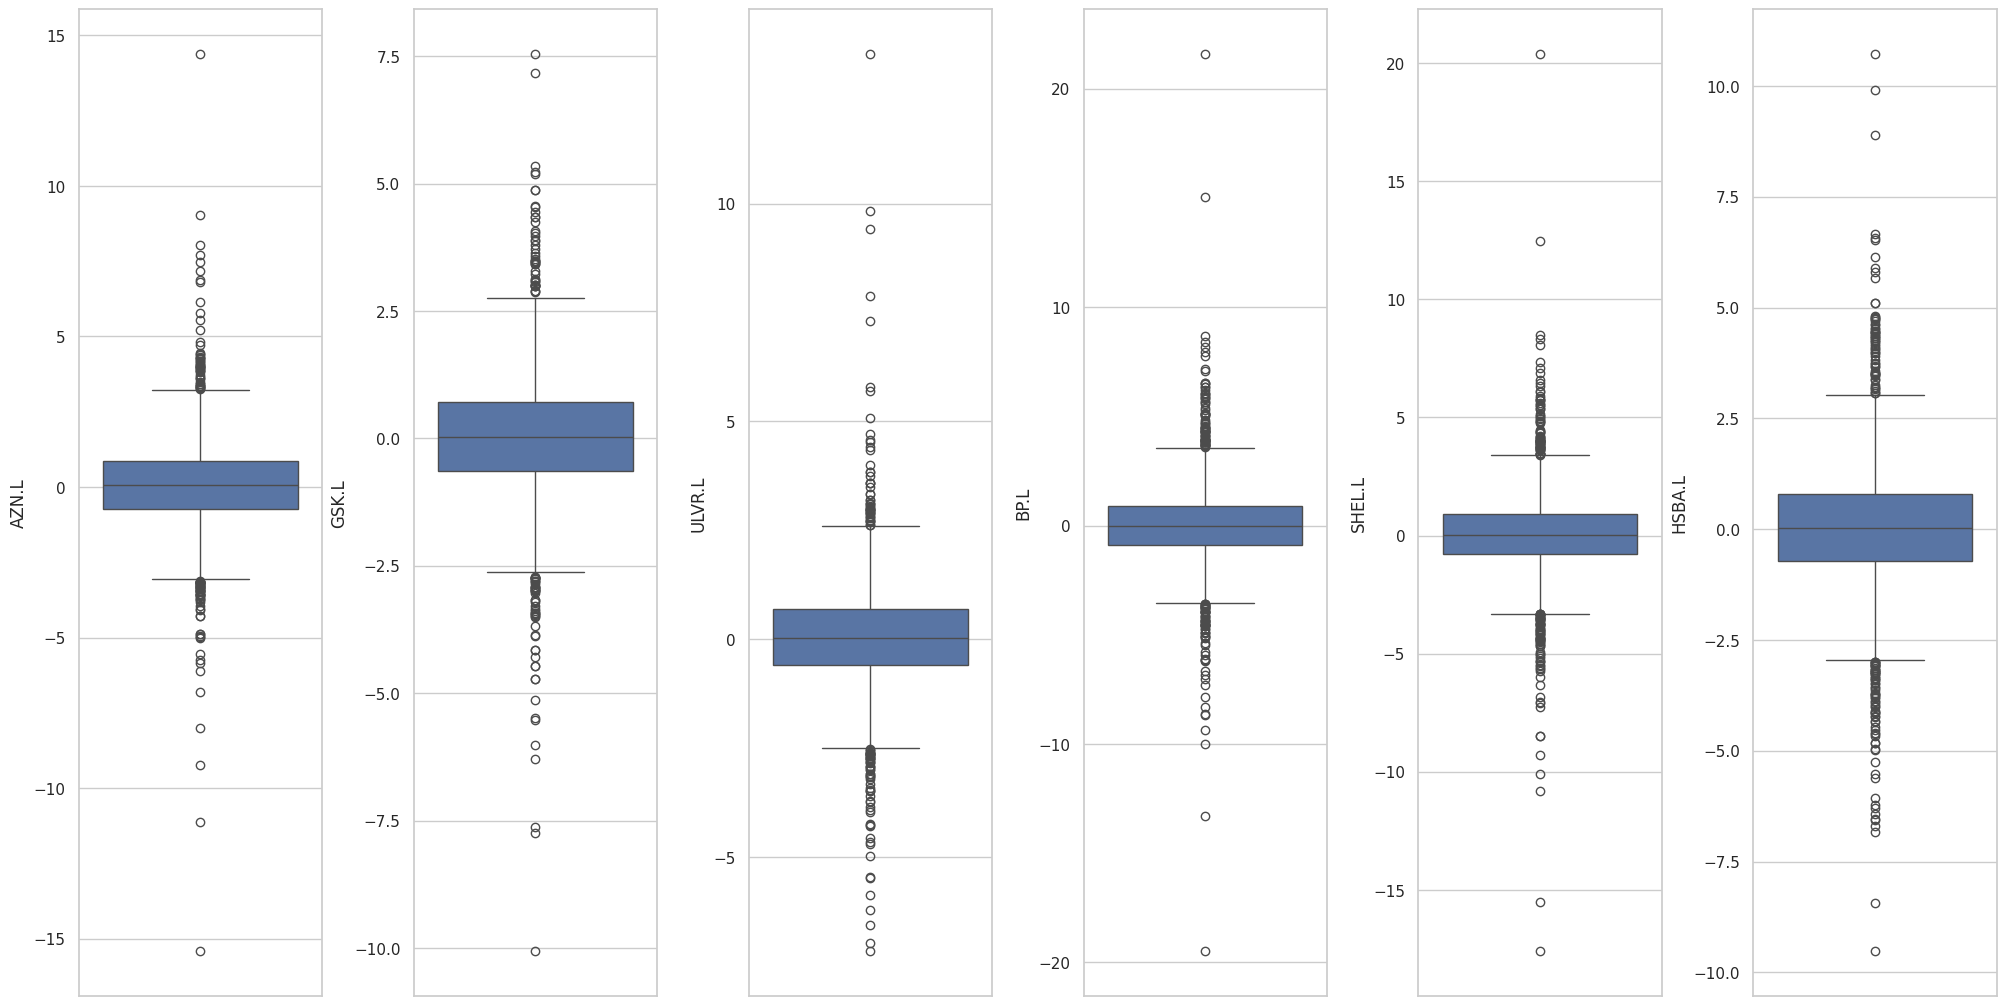

In [62]:
# Box plots

# Box and whisker plots are a standardised way of displaying the distribution of data based on a five number summary:
# (minimum, first quartile (Q1), median, third quartile (Q3), and maximum), with a line going through the box at the median.
# Boxplots showing distribution of the returns data over the time period 

sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=6, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in returns.items():
    sns.boxplot(y=k, data=returns, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [63]:
# Analysis
# By comparing the interquartile ranges (box lengths), we can compare dispersion. If two boxes do not overlap with one another then there is a difference between the two groups. 
# We can see that ULVR. does not overlap with the other stocks. If we compare the respective medians and the median line of one box lies outside of another entirely, 
# then there is likely to be a difference between the two groups. Again we can see that ULVR. is different.

# Whiskers show how big a range there is between maximum and minimum values, with larger ranges indicating wider distribution, that is, more scattered data. 
# We can look for signs of skewness suggesting that data may not be normally distributed. Skewed data show a lopsided box plot, where the median cuts the box into two
# unequal pieces. If the longer part of the box is above the median, the data is said to be positively skewed. 
# If the longer part is or below the median, the data is negatively skewed.

# Any values in the data set that are more extreme than the adjacent values are plotted as separate points on the box plot. This identifies them as potential outliers.

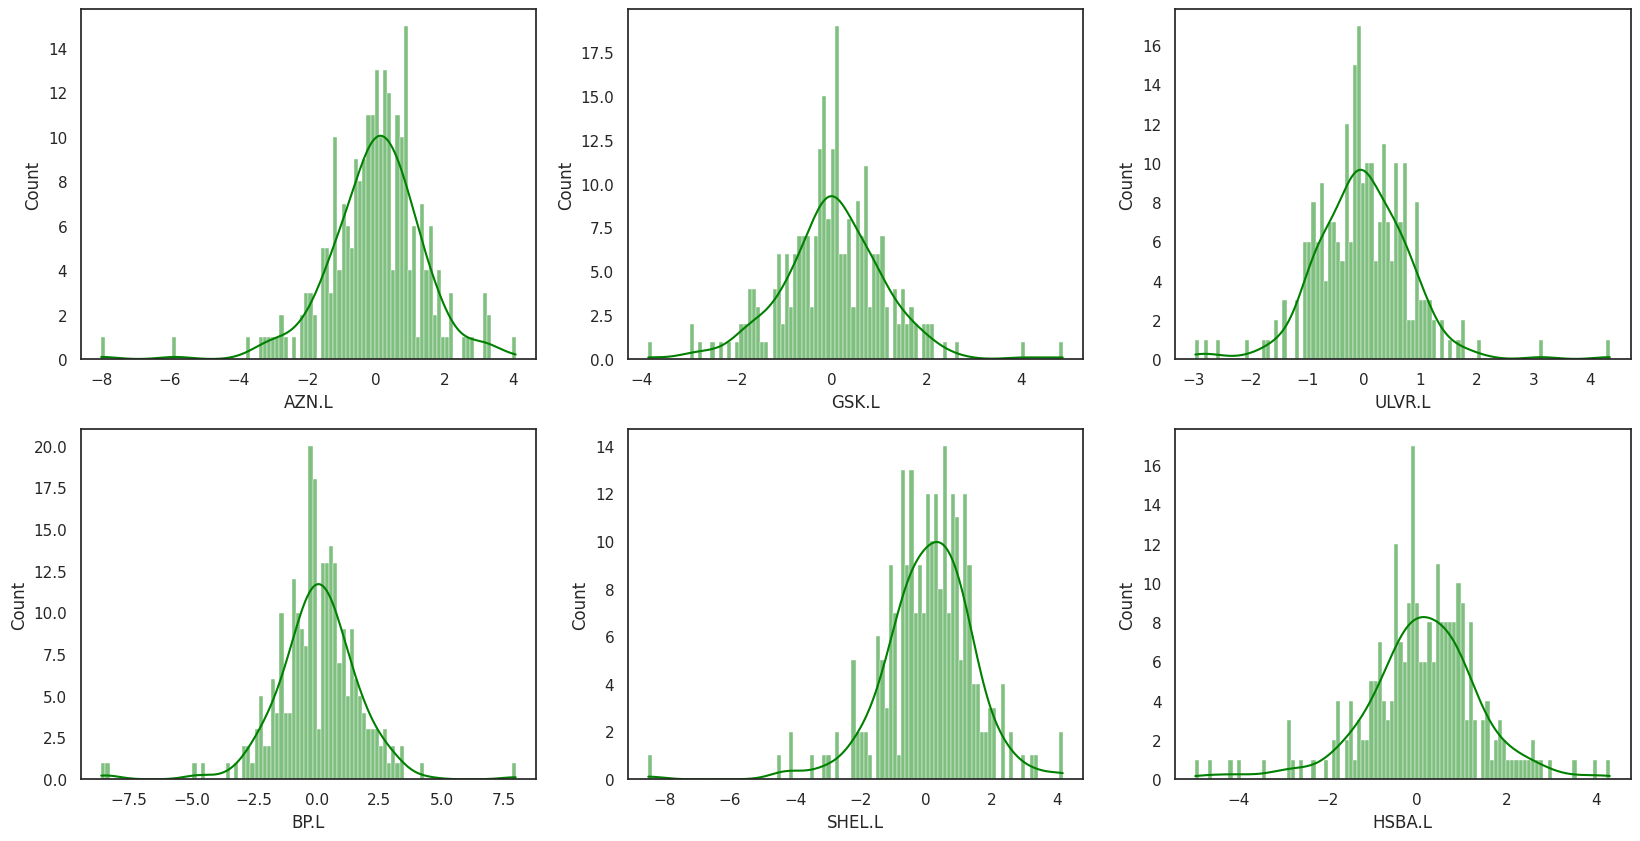

In [68]:
# Distribution plots
# Distribution plots depict the variation in the data distribution. Here the distribution of returns is shown by a histogram and a line in combination with it which is the kernel
# density estimate.

# Distribution plots showing the data for returns for 2023 

sns.set_style("white")

tickers = ['AZN.L', 'GSK.L', 'ULVR.L', 'BP.L', 'SHEL.L', 'HSBA.L']
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for ticker in tickers:
    sns.histplot(returns.loc['2023-01-01':'2023-12-31'][ticker], color='green', bins=100, ax=axs[index], kde=True)
    index += 1

In [69]:
# Covariance

# Covariance indicates the direction of the linear relationship between variables. It is a measure of the relationship between two stocks' returns and can help determine 
# if stocks' returns tend to move with or against each other. Investors might even be able to select stocks that complement each other in terms of price movement. 
# This can help reduce the overall risk and increase the overall potential return of a portfolio.

# Covariance matrix to show direction of relationship between stocks' returns

returns.cov() 

,AZN.L,GSK.L,ULVR.L,BP.L,SHEL.L,HSBA.L
AZN.L,2.385421,1.077463,0.689897,0.569869,0.534549,0.533798
GSK.L,1.077463,1.595471,0.692479,0.796392,0.774858,0.631040
ULVR.L,0.689897,0.692479,1.577523,0.486441,0.519229,0.529119
BP.L,0.569869,0.796392,0.486441,3.724308,3.133565,1.459452
SHEL.L,0.534549,0.774858,0.519229,3.133565,3.410567,1.371350
HSBA.L,0.533798,0.631040,0.529119,1.459452,1.371350,2.295925


In [70]:
# Correlation

# Correlation measures both the strength and direction of the linear relationship between two variables, or the degree to which two variables move in relation to each other

# Correlation matrix to show strength and direction of relationship between stocks' returns

returns.corr()

,AZN.L,GSK.L,ULVR.L,BP.L,SHEL.L,HSBA.L
AZN.L,1.000000,0.552301,0.355643,0.191192,0.187409,0.228095
GSK.L,0.552301,1.000000,0.436490,0.326708,0.332173,0.329711
ULVR.L,0.355643,0.436490,1.000000,0.200687,0.223850,0.278027
BP.L,0.191192,0.326708,0.200687,1.000000,0.879230,0.499101
SHEL.L,0.187409,0.332173,0.223850,0.879230,1.000000,0.490068
HSBA.L,0.228095,0.329711,0.278027,0.499101,0.490068,1.000000


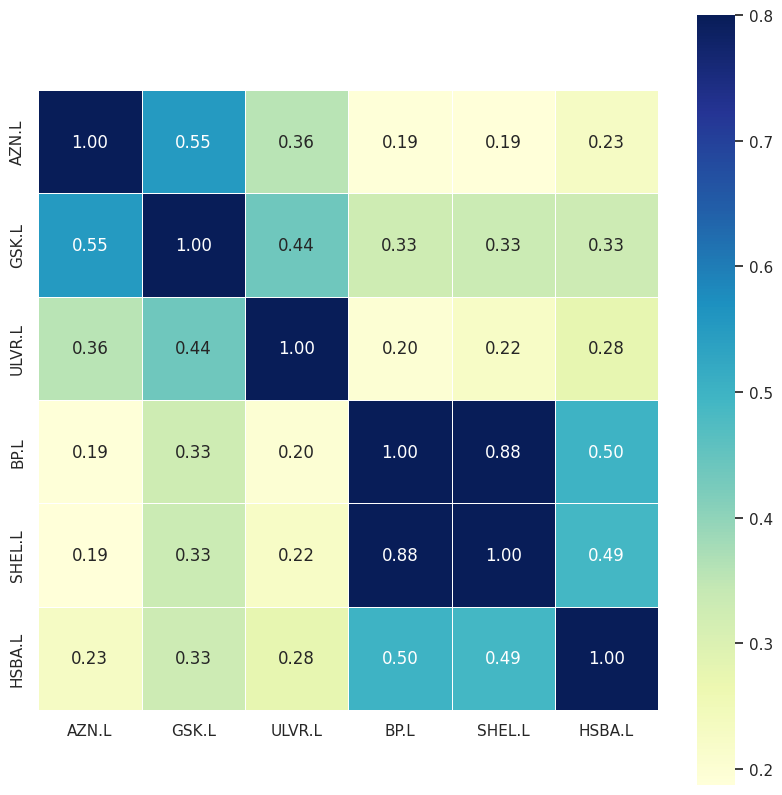

In [71]:
# The heatmap clearly shows the strength of correlation between pairs of company returns

plt.figure(figsize=(10, 10))
sns.heatmap(data = returns.corr(), vmax=.8, linewidths=0.5,  fmt='.2f',
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.show()

In [72]:
# The strongest correlation can be observed between oil stocks (SHELL and BP), followed by the pharmaceutical stocks (GSK and AZN) 

In [73]:
# FTSE 100 Index data

# Finally let's get data from the launch of the FTSE 100 Index in January 1984 to the end of 2023 as being representative of the UK stock market. 
# Download FTSE 100 historical stock data from Yahoo! Finance for 1984-2020

ftse100_idx_to_2024 = yf.download("^FTSE", start=datetime.datetime(1984, 1, 1), 
                                     end=datetime.datetime(2024, 1, 1))
ftse100_idx_to_2024

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1984-01-03,997.500000,1001.400024,997.500000,997.500000,997.500000,0
1984-01-04,997.500000,999.500000,993.299988,998.599976,998.599976,0
1984-01-05,1007.099976,1015.799988,1007.099976,1015.799988,1015.799988,0
1984-01-06,1019.000000,1029.300049,1019.000000,1029.000000,1029.000000,0
1984-01-09,1030.599976,1035.400024,1030.599976,1034.599976,1034.599976,0
...,...,...,...,...,...,...
2023-12-21,7715.700195,7715.700195,7668.399902,7694.700195,7694.700195,603350200
2023-12-22,7694.700195,7715.200195,7676.399902,7697.500000,7697.500000,329604400
2023-12-27,7697.500000,7759.700195,7697.500000,7725.000000,7725.000000,432594200


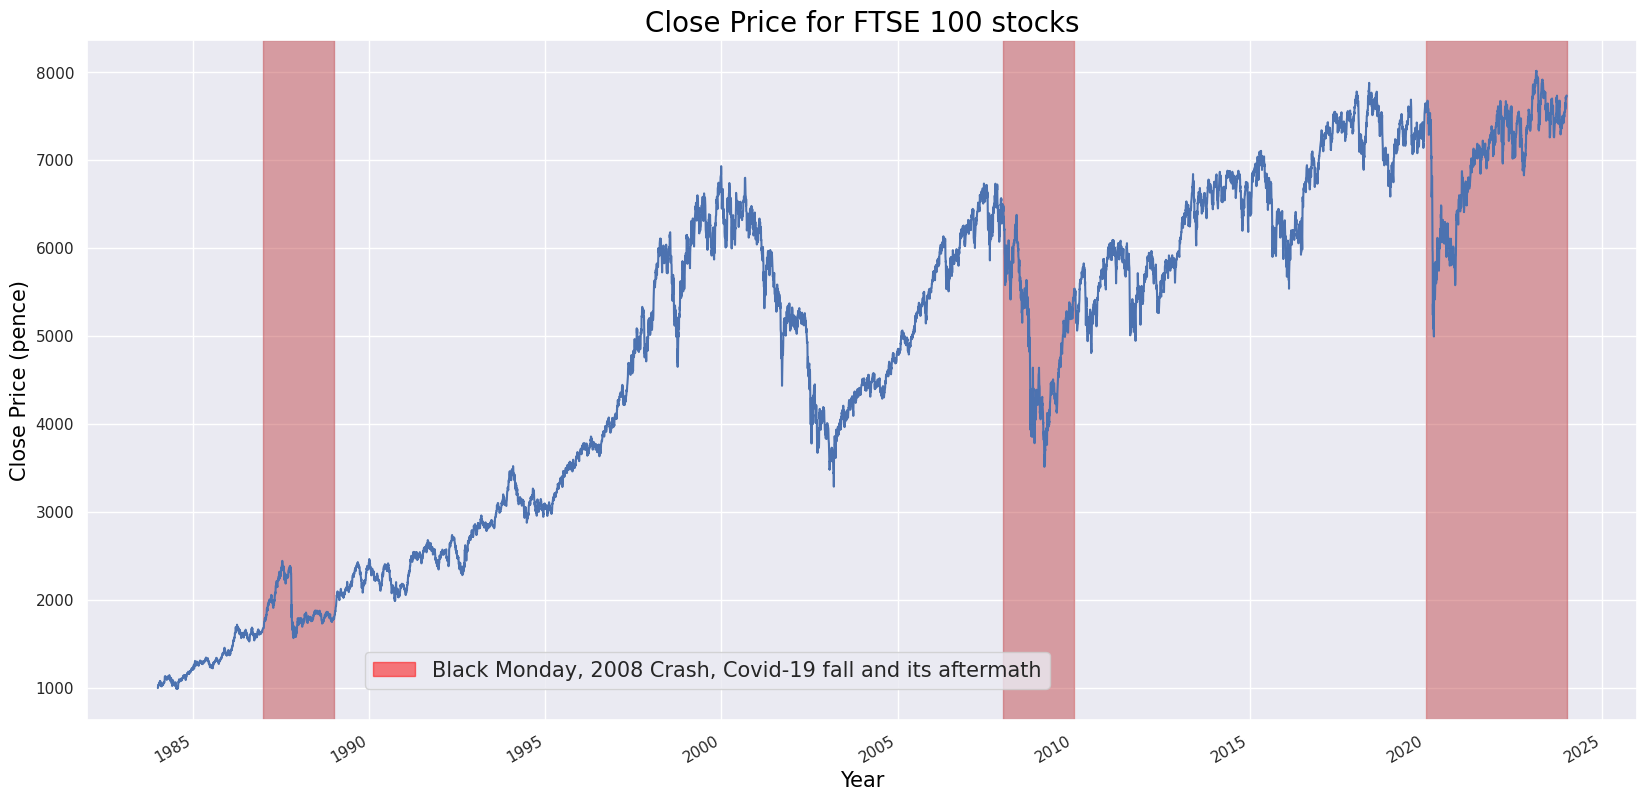

In [78]:
# Now let's visualize the data
def ftse100_to_2024_plot():
    ftse100_idx_to_2024['Close'].plot(grid = True)
    sns.set(rc={'figure.figsize':(20, 10)})
    plt.axvspan('1987','1989',color='r',alpha=.5)
    plt.axvspan('2008','2010',color='r',alpha=.5)
    plt.axvspan('2020','2024',color='r',alpha=.5)
    labs = mpatches.Patch(color='red',alpha=.5, label="Black Monday, 2008 Crash, Covid-19 fall and its aftermath")
    plt.legend(handles=[labs], prop={"size":15},  bbox_to_anchor=(0.4, 0.1), loc='upper center', borderaxespad=0.)
    plt.title('Close Price for FTSE 100 stocks', color = 'black', fontsize = 20)
    plt.xlabel('Year', color = 'black', fontsize = 15)
    plt.ylabel('Close Price (pence)', color = 'black', fontsize = 15)
    plt.show();

ftse100_to_2024_plot()